# Telecom Customer Churn

In [1]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# data
df  = pd.read_csv('E:\omar-analyst\machine learning python\projects\churn\data\customer_churn.csv')

<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\o'
C:\Users\scan\AppData\Local\Temp\ipykernel_1468\1533228959.py:2: SyntaxWarning: invalid escape sequence '\o'
  df  = pd.read_csv('E:\omar-analyst\machine learning python\projects\churn\data\customer_churn.csv')


In [3]:
df.head()

Call Failure  Complaints  Subscription Length  ...  Age  Customer Value  Churn
0             8           0                   38  ...   30         197.640      0
1             0           0                   39  ...   25          46.035      0
2            10           0                   37  ...   30        1536.520      0
3            10           0                   38  ...   15         240.020      0
4             3           0                   38  ...   15         145.805      0

[5 rows x 14 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call Failure             3150 non-null   int64  
 1   Complaints               3150 non-null   int64  
 2   Subscription Length      3150 non-null   int64  
 3   Charge Amount            3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

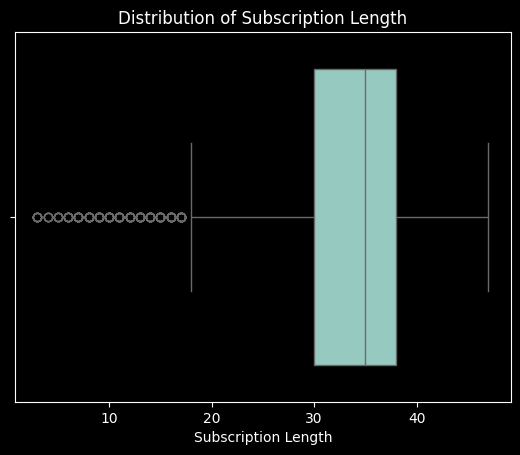

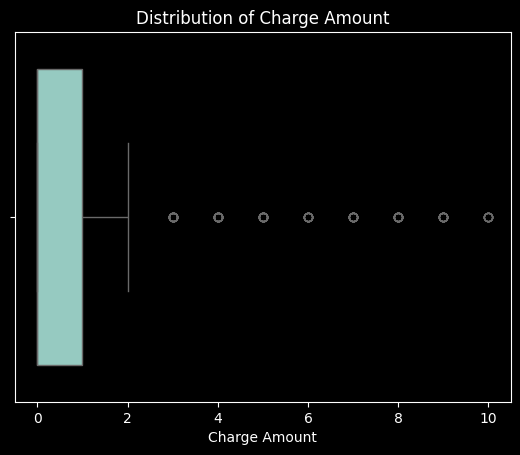

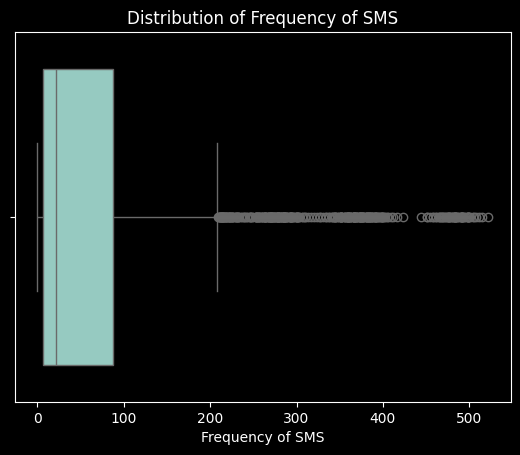

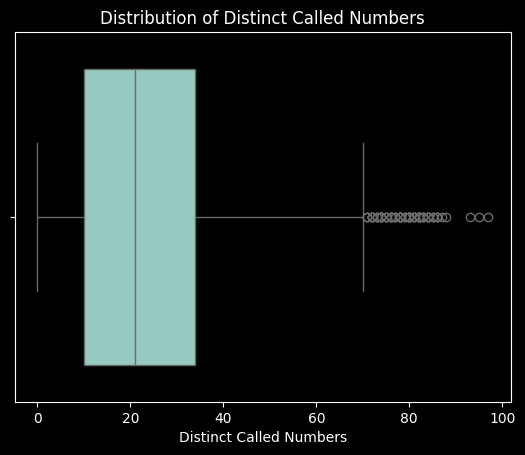

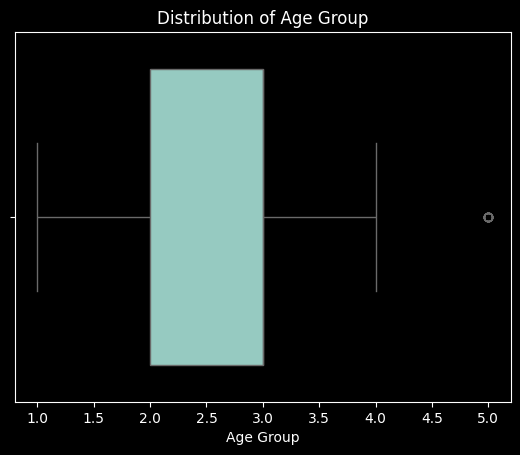

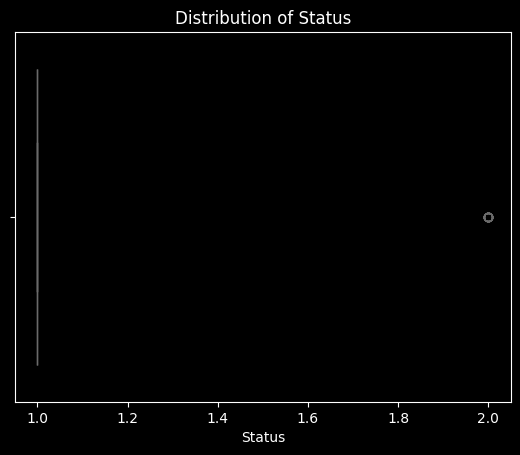

In [ ]:
for col in df.columns:
    sns.boxplot(x=df[col])
    plt.title("Distribution of " + col)
    #plt.savefig("distribution_" + col + ".png")
    plt.show()

In [6]:
df.describe()

Call Failure   Complaints  ...  Customer Value        Churn
count   3150.000000  3150.000000  ...     3150.000000  3150.000000
mean       7.627937     0.076508  ...      470.972916     0.157143
std        7.263886     0.265851  ...      517.015433     0.363993
min        0.000000     0.000000  ...        0.000000     0.000000
25%        1.000000     0.000000  ...      113.801250     0.000000
50%        6.000000     0.000000  ...      228.480000     0.000000
75%       12.000000     0.000000  ...      788.388750     0.000000
max       36.000000     1.000000  ...     2165.280000     1.000000

[8 rows x 14 columns]

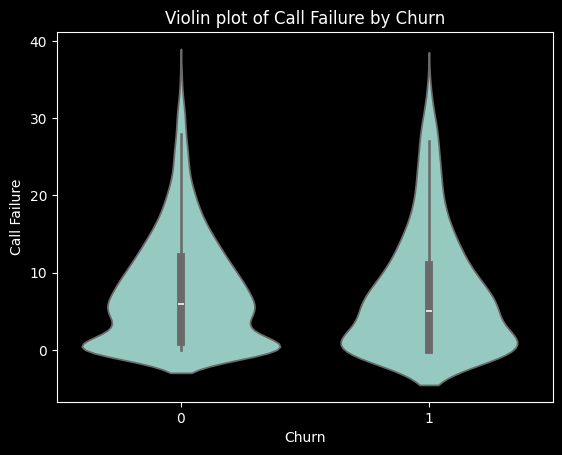

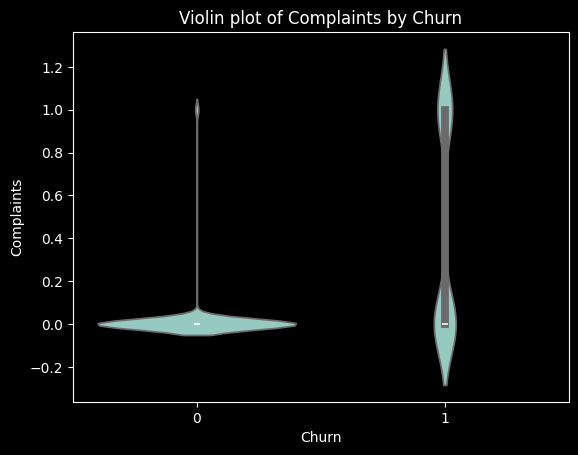

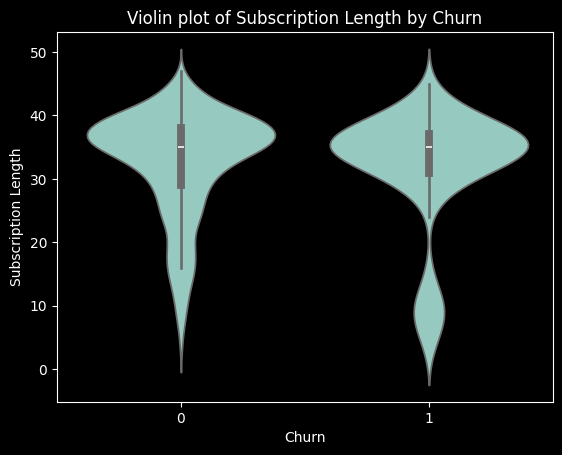

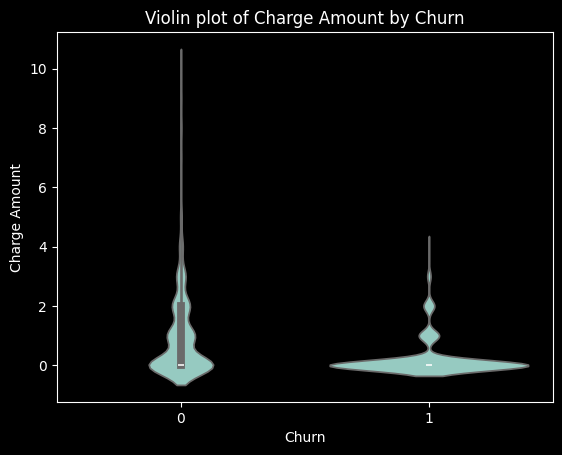

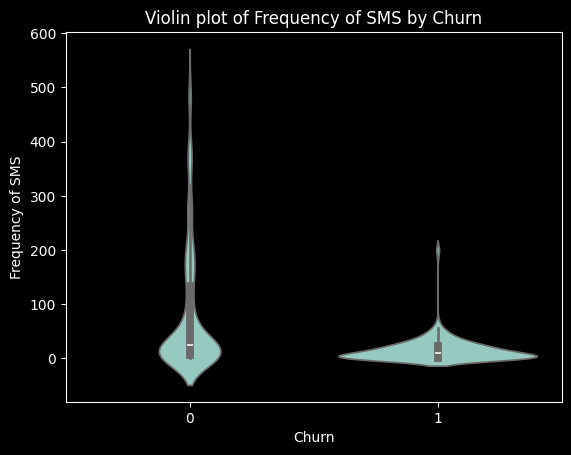

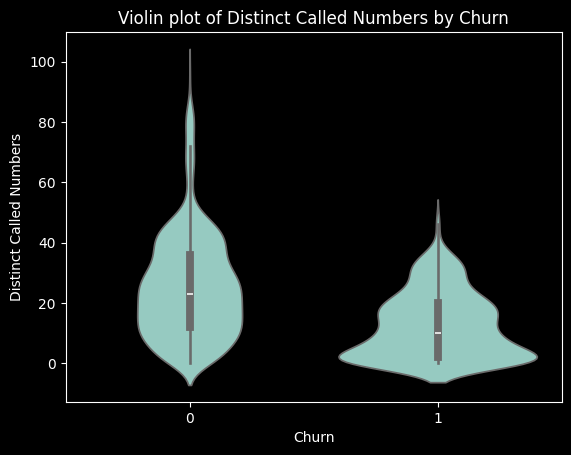

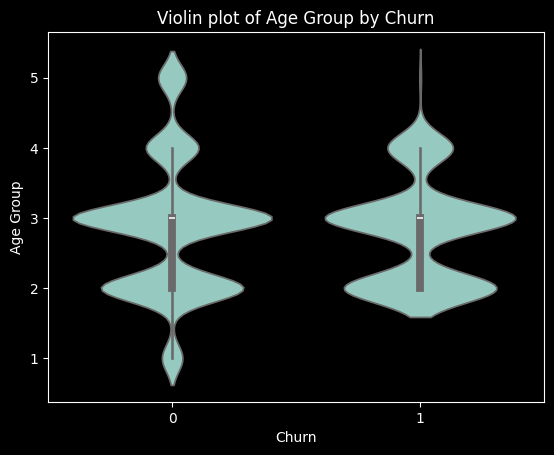

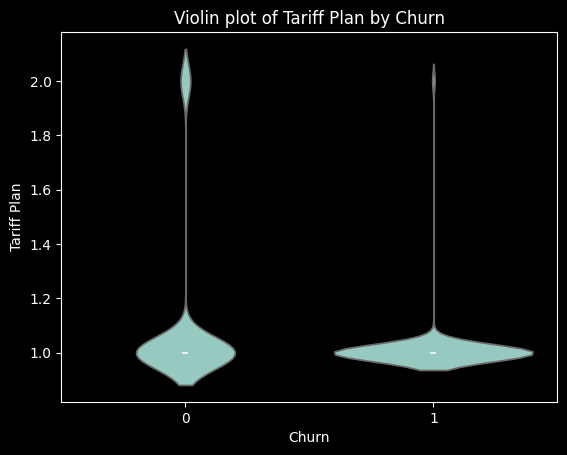

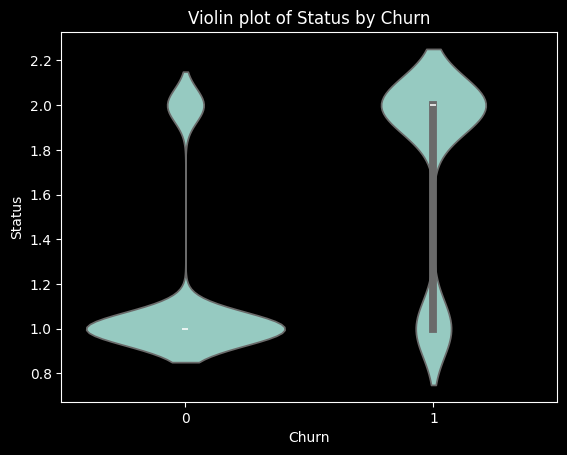

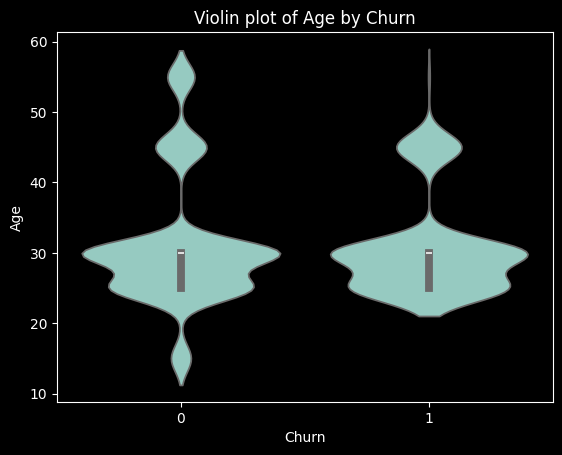

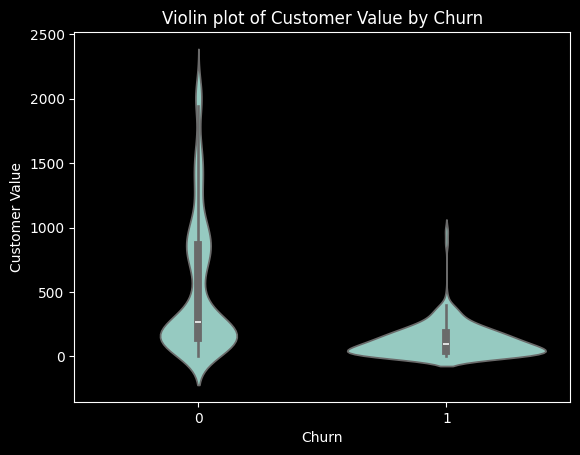

In [ ]:
for col in df.columns:
    if col != 'Churn':
        sns.violinplot(x='Churn', y=col, data=df)
        plt.title("Violin plot of " + col + " by Churn")
        #plt.savefig(f'violin_{col}_by_churn.png')
        plt.show()
        


# üß† Project Note

* I will start by building a Logistic Regression model first, as it has the ability to interpret the coefficients, not just make predictions.

In [10]:
X = df.drop('Churn', axis=1).values
y = df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       520
           1       0.46      0.17      0.25       110

    accuracy                           0.82       630
   macro avg       0.65      0.57      0.57       630
weighted avg       0.78      0.82      0.79       630



c:\Users\scan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
coefficients = pd.DataFrame({'Feature': df.columns[:-1], 'Coefficient': log.coef_[0]})
coefficients['odds_ratio'] = np.exp(coefficients['Coefficient'])
print(coefficients.sort_values(by='odds_ratio', ascending=False))
coefficients

                    Feature  Coefficient  odds_ratio
0              Call Failure     0.194141    1.214268
1                Complaints     0.101316    1.106626
10                   Status     0.072011    1.074667
8                 Age Group     0.008428    1.008464
12           Customer Value     0.007756    1.007787
7   Distinct Called Numbers     0.001619    1.001620
9               Tariff Plan     0.001009    1.001010
4            Seconds of Use    -0.000243    0.999757
11                      Age    -0.002658    0.997346
2       Subscription Length    -0.011198    0.988865
6          Frequency of SMS    -0.051872    0.949450
5          Frequency of use    -0.052356    0.948991
3             Charge Amount    -0.090510    0.913466


Feature  Coefficient  odds_ratio
0              Call Failure     0.194141    1.214268
1                Complaints     0.101316    1.106626
2       Subscription Length    -0.011198    0.988865
3             Charge Amount    -0.090510    0.913466
4            Seconds of Use    -0.000243    0.999757
5          Frequency of use    -0.052356    0.948991
6          Frequency of SMS    -0.051872    0.949450
7   Distinct Called Numbers     0.001619    1.001620
8                 Age Group     0.008428    1.008464
9               Tariff Plan     0.001009    1.001010
10                   Status     0.072011    1.074667
11                      Age    -0.002658    0.997346
12           Customer Value     0.007756    1.007787

In [12]:
plt.figure(figsize=(10,6))
plt.title('Feature Coefficients')
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

## üìä ÿ™ÿ≠ŸÑŸäŸÑ ÿ£ŸáŸÖŸäÿ© ÿßŸÑŸÖŸäÿ≤ÿßÿ™ (Feature Coefficients)

ŸäŸàÿ∂ÿ≠ Ÿáÿ∞ÿß ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä "ÿßŸÑŸàÿµŸÅÿ©" ÿßŸÑÿ™Ÿä Ÿäÿ≥ÿ™ÿÆÿØŸÖŸáÿß ŸÜŸÖŸàÿ∞ÿ¨ ÿßŸÑÿßŸÜÿ≠ÿØÿßÿ± ÿßŸÑŸÑŸàÿ¨Ÿäÿ≥ÿ™Ÿä ŸÑŸÑÿ™ŸÜÿ®ÿ§ ÿ®ÿßŸÑŸÄ Churn.

ÿ•ŸÜŸá ŸäŸàÿ∂ÿ≠ ŸÑŸÜÿß ŸÖÿß ŸáŸä ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ÿßŸÑÿ™Ÿä **ÿ™ÿØŸÅÿπ ÿßŸÑÿπŸÖŸäŸÑ ŸÑŸÑÿ±ÿ≠ŸäŸÑ** (ÿßŸÑŸÖÿπÿßŸÖŸÑÿßÿ™ ÿßŸÑŸÖŸàÿ¨ÿ®ÿ©  Positive)ÿå ŸàŸÖÿß ŸáŸä ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ÿßŸÑÿ™Ÿä **ÿ™ÿ¥ÿ¨ÿπŸá ÿπŸÑŸâ ÿßŸÑÿ®ŸÇÿßÿ°** (ÿßŸÑŸÖÿπÿßŸÖŸÑÿßÿ™ ÿßŸÑÿ≥ÿßŸÑÿ®ÿ© Negative).

**ÿ∑ŸàŸÑ ÿßŸÑÿ¥ÿ±Ÿäÿ∑ = ŸÇŸàÿ© ÿßŸÑÿ™ÿ£ÿ´Ÿäÿ±.**

---

### üò° 1. ÿ£ŸáŸÖ ÿßŸÑÿπŸàÿßŸÖŸÑ ÿßŸÑÿ™Ÿä ÿ™ÿ≥ÿ®ÿ® ÿßŸÑŸÖÿ∫ÿßÿØÿ±ÿ© (Churn) - (ÿßŸÑŸÖÿπÿßŸÖŸÑÿßÿ™ ÿßŸÑŸÖŸàÿ¨ÿ®ÿ©)

Ÿáÿ∞Ÿá ŸáŸä "ÿßŸÑÿ£ÿπŸÑÿßŸÖ ÿßŸÑÿ≠ŸÖÿ±ÿßÿ°". ŸÉŸÑŸÖÿß ÿ≤ÿßÿØÿ™ ŸÇŸäŸÖÿ© Ÿáÿ∞Ÿá ÿßŸÑŸÖŸäÿ≤ÿßÿ™ÿå ÿ≤ÿßÿØÿ™ ÿßÿ≠ÿ™ŸÖÿßŸÑŸäÿ© ŸÖÿ∫ÿßÿØÿ±ÿ© ÿßŸÑÿπŸÖŸäŸÑ.

1.  **`Call Failure` (ŸÅÿ¥ŸÑ ÿßŸÑŸÖŸÉÿßŸÑŸÖÿßÿ™): (ŸÖÿπÿßŸÖŸÑ ‚âà +0.19)**
    * **ÿßŸÑÿ™ŸÅÿ≥Ÿäÿ±:** Ÿáÿ∞ÿß ŸáŸà ÿ£ŸÇŸàŸâ ÿ≥ÿ®ÿ® ŸÑŸÑÿ±ÿ≠ŸäŸÑ. ŸÉŸÑŸÖÿß **ÿ≤ÿßÿØ** ÿπÿØÿØ ŸÖÿ±ÿßÿ™ ŸÅÿ¥ŸÑ ÿßŸÑŸÖŸÉÿßŸÑŸÖÿßÿ™ÿå ÿ≤ÿßÿØÿ™ ÿßÿ≠ÿ™ŸÖÿßŸÑŸäÿ© ÿßŸÑŸÖÿ∫ÿßÿØÿ±ÿ©. Ÿáÿ∞ÿß ŸÖŸÜÿ∑ŸÇŸä ÿ™ŸÖÿßŸÖÿßŸã.
2.  **`Complaints` (ÿßŸÑÿ¥ŸÉÿßŸàŸâ): (ŸÖÿπÿßŸÖŸÑ ‚âà +0.09)**
    * **ÿßŸÑÿ™ŸÅÿ≥Ÿäÿ±:** Ÿáÿ∞Ÿá ŸÖŸäÿ≤ÿ© ÿ´ŸÜÿßÿ¶Ÿäÿ© (0 = ŸÑÿß ÿ¥ŸÉŸàŸâÿå 1 = ÿ¥ŸÉŸàŸâ). ÿßŸÑŸÖÿπÿßŸÖŸÑ ÿßŸÑŸÖŸàÿ¨ÿ® ŸäÿπŸÜŸä ÿ£ŸÜ ÿßŸÑÿßŸÜÿ™ŸÇÿßŸÑ ŸÖŸÜ 0 ÿ•ŸÑŸâ **1** (ÿ£Ÿä ÿ™ŸÇÿØŸäŸÖ ÿ¥ŸÉŸàŸâ) Ÿäÿ±ŸÅÿπ ÿßÿ≠ÿ™ŸÖÿßŸÑŸäÿ© ÿßŸÑŸÖÿ∫ÿßÿØÿ±ÿ© ÿ®ÿ¥ŸÉŸÑ ŸÉÿ®Ÿäÿ±.
3.  **`Status` (ÿßŸÑÿ≠ÿßŸÑÿ©): (ŸÖÿπÿßŸÖŸÑ ‚âà +0.07)**
    * **ÿßŸÑÿ™ŸÅÿ≥Ÿäÿ±:** Ÿáÿ∞Ÿá ŸÖŸäÿ≤ÿ© ÿ´ŸÜÿßÿ¶Ÿäÿ© (1 = ŸÜÿ¥ÿ∑ÿå 2 = ÿ∫Ÿäÿ± ŸÜÿ¥ÿ∑). ÿßŸÑŸÖÿπÿßŸÖŸÑ ÿßŸÑŸÖŸàÿ¨ÿ® ŸäÿπŸÜŸä ÿ£ŸÜ ÿßŸÑÿßŸÜÿ™ŸÇÿßŸÑ ŸÖŸÜ 1 ÿ•ŸÑŸâ **2** (ÿ£Ÿä ÿßŸÑÿ™ÿ≠ŸàŸÑ ÿ•ŸÑŸâ "ÿ∫Ÿäÿ± ŸÜÿ¥ÿ∑") Ÿäÿ±ŸÅÿπ ÿßÿ≠ÿ™ŸÖÿßŸÑŸäÿ© ÿßŸÑŸÖÿ∫ÿßÿØÿ±ÿ©. Ÿáÿ∞ÿß ÿ®ÿØŸäŸáŸäÿå ŸÅÿßŸÑÿπŸÖŸäŸÑ ÿ∫Ÿäÿ± ÿßŸÑŸÜÿ¥ÿ∑ ŸáŸà ÿ®ÿßŸÑŸÅÿπŸÑ ŸÅŸä ÿ∑ÿ±ŸäŸÇŸá ŸÑŸÑÿ±ÿ≠ŸäŸÑ.

---

### üòä 2. ÿ£ŸáŸÖ ÿßŸÑÿπŸàÿßŸÖŸÑ ÿßŸÑÿ™Ÿä ÿ™ÿ¥ÿ¨ÿπ ÿπŸÑŸâ ÿßŸÑÿ®ŸÇÿßÿ° (Retention) - (ÿßŸÑŸÖÿπÿßŸÖŸÑÿßÿ™ ÿßŸÑÿ≥ÿßŸÑÿ®ÿ©)

Ÿáÿ∞Ÿá ŸáŸä "ÿπŸàÿßŸÖŸÑ ÿßŸÑŸàŸÑÿßÿ°". ŸÉŸÑŸÖÿß ÿ≤ÿßÿØÿ™ ŸÇŸäŸÖÿ© Ÿáÿ∞Ÿá ÿßŸÑŸÖŸäÿ≤ÿßÿ™ÿå ŸÇŸÑÿ™ ÿßÿ≠ÿ™ŸÖÿßŸÑŸäÿ© ŸÖÿ∫ÿßÿØÿ±ÿ© ÿßŸÑÿπŸÖŸäŸÑ.

1.  **`Charge Amount` (ŸÇŸäŸÖÿ© ÿßŸÑÿ¥ÿ≠ŸÜ): (ŸÖÿπÿßŸÖŸÑ ‚âà -0.10)**
    * **ÿßŸÑÿ™ŸÅÿ≥Ÿäÿ±:** Ÿáÿ∞Ÿá ŸÖŸäÿ≤ÿ© ÿ™ÿ±ÿ™Ÿäÿ®Ÿäÿ© (0 = ÿßŸÑÿ£ÿØŸÜŸâÿå 9 = ÿßŸÑÿ£ÿπŸÑŸâ). ÿßŸÑŸÖÿπÿßŸÖŸÑ **ÿßŸÑÿ≥ÿßŸÑÿ®** ŸäÿπŸÜŸä ÿ£ŸÜŸá ŸÉŸÑŸÖÿß **ÿ≤ÿßÿØÿ™** ŸÇŸäŸÖÿ© ÿßŸÑÿ¥ÿ≠ŸÜ (ÿ£Ÿä ŸÉŸÑŸÖÿß ÿßÿ™ÿ¨ŸáŸÜÿß ŸÜÿ≠Ÿà 9)ÿå **ŸÇŸÑÿ™** ÿßÿ≠ÿ™ŸÖÿßŸÑŸäÿ© ÿßŸÑŸÖÿ∫ÿßÿØÿ±ÿ©. ÿßŸÑÿπŸÖŸÑÿßÿ° ÿßŸÑÿ∞ŸäŸÜ ŸäÿØŸÅÿπŸàŸÜ ÿ£ŸÉÿ´ÿ± ŸáŸÖ ÿßŸÑÿ£ŸÉÿ´ÿ± ŸàŸÑÿßÿ°Ÿã.
2.  **`Frequency of use` (ÿ™ŸÉÿ±ÿßÿ± ÿßŸÑÿßÿ≥ÿ™ÿÆÿØÿßŸÖ): (ŸÖÿπÿßŸÖŸÑ ‚âà -0.05)**
    * **ÿßŸÑÿ™ŸÅÿ≥Ÿäÿ±:** ŸÉŸÑŸÖÿß **ÿ≤ÿßÿØ** ÿπÿØÿØ ÿßŸÑŸÖŸÉÿßŸÑŸÖÿßÿ™ÿå **ŸÇŸÑÿ™** ÿßÿ≠ÿ™ŸÖÿßŸÑŸäÿ© ÿßŸÑŸÖÿ∫ÿßÿØÿ±ÿ©.
3.  **`Frequency of SMS` (ÿ™ŸÉÿ±ÿßÿ± ÿßŸÑÿ±ÿ≥ÿßÿ¶ŸÑ): (ŸÖÿπÿßŸÖŸÑ ‚âà -0.05)**
    * **ÿßŸÑÿ™ŸÅÿ≥Ÿäÿ±:** ŸÉŸÑŸÖÿß **ÿ≤ÿßÿØ** ÿπÿØÿØ ÿßŸÑÿ±ÿ≥ÿßÿ¶ŸÑÿå **ŸÇŸÑÿ™** ÿßÿ≠ÿ™ŸÖÿßŸÑŸäÿ© ÿßŸÑŸÖÿ∫ÿßÿØÿ±ÿ©.

---

### ‚ö†Ô∏è 3. ÿ≠ŸÑ ÿßŸÑŸÑÿ∫ÿ≤: ŸÑŸÖÿßÿ∞ÿß ÿ®ÿπÿ∂ ÿßŸÑŸÖÿπÿßŸÖŸÑÿßÿ™ = ÿµŸÅÿ±ÿü

> **ÿßŸÑŸÑÿ∫ÿ≤:** ŸÑŸÖÿßÿ∞ÿß ŸÖŸäÿ≤ÿßÿ™ ŸÖÿ´ŸÑ `Customer Value` Ÿà `Seconds of Use` ÿ£ÿ∏Ÿáÿ±ÿ™ ŸÖÿπÿßŸÖŸÑ (Coefficient) Ÿäÿ≥ÿßŸàŸä ÿµŸÅÿ±ÿå ÿ®ŸäŸÜŸÖÿß ÿßŸÑÿ±ÿ≥ŸàŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸäÿ© (Violin Plots) ÿ£ÿ∏Ÿáÿ±ÿ™ ÿ£ŸÜŸáÿß ŸÖŸáŸÖÿ© ÿ¨ÿØÿßŸãÿü

**ÿßŸÑÿ≠ŸÑ ÿßŸÑŸÖÿ§ŸÉÿØ ÿßŸÑÿ¢ŸÜ: ÿßŸÑÿßÿ±ÿ™ÿ®ÿßÿ∑ ÿßŸÑŸÖÿ™ÿπÿØÿØ (Multicollinearity)**

* ŸÖŸÜ ÿßŸÑŸàÿßÿ∂ÿ≠ ÿßŸÑÿ¢ŸÜ ÿ£ŸÜ `Customer Value` (ŸÇŸäŸÖÿ© ÿßŸÑÿπŸÖŸäŸÑ) ŸáŸä ŸÇŸäŸÖÿ© **ŸÖÿ≠ÿ≥Ÿàÿ®ÿ©** ÿ®ŸÜÿßÿ°Ÿã ÿπŸÑŸâ ŸÖŸäÿ≤ÿßÿ™ ÿ£ÿÆÿ±Ÿâ ŸÖÿ´ŸÑ `Seconds of Use` (ÿ´ŸàÿßŸÜŸä ÿßŸÑÿßÿ≥ÿ™ÿÆÿØÿßŸÖ) Ÿà `Charge Amount` (ŸÇŸäŸÖÿ© ÿßŸÑÿ¥ÿ≠ŸÜ).
* Ÿáÿ∞Ÿá ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ÿßŸÑÿ´ŸÑÿßÿ´ (`Customer Value`, `Seconds of Use`, `Charge Amount`) ÿ™ÿ≠ŸÉŸä "ŸÜŸÅÿ≥ ÿßŸÑŸÇÿµÿ©" ŸÑŸÑŸÜŸÖŸàÿ∞ÿ¨ (ŸàŸáŸä "ŸÖÿØŸâ ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿßŸÑÿπŸÖŸäŸÑ ŸÑŸÑÿÆÿØŸÖÿ©").
* ŸÜŸÖŸàÿ∞ÿ¨ ÿßŸÑÿßŸÜÿ≠ÿØÿßÿ± ÿßŸÑŸÑŸàÿ¨Ÿäÿ≥ÿ™Ÿä "ÿ∞ŸÉŸä" ÿ®ŸÖÿß ŸäŸÉŸÅŸä ŸÑŸäÿ±Ÿâ Ÿáÿ∞ÿß ÿßŸÑÿ™ŸÉÿ±ÿßÿ±. ŸàŸÑŸÉŸä ŸÑÿß Ÿäÿ±ÿ™ÿ®ŸÉÿå ŸÅÿ•ŸÜŸá:
    1.  **ÿßÿÆÿ™ÿßÿ± ŸÖŸäÿ≤ÿ© Ÿàÿßÿ≠ÿØÿ©** ŸÑÿ™ŸÉŸàŸÜ "ÿßŸÑŸÖŸÖÿ´ŸÑ" ÿπŸÜ Ÿáÿ∞Ÿá ÿßŸÑŸÅŸÉÿ±ÿ© (ŸàŸáŸä `Charge Amount`).
    2.  ÿ£ÿπÿ∑Ÿâ Ÿáÿ∞Ÿá ÿßŸÑŸÖŸäÿ≤ÿ© "ÿßŸÑŸàÿ≤ŸÜ" (ÿßŸÑŸÖÿπÿßŸÖŸÑ ÿßŸÑÿ≥ÿßŸÑÿ® ÿßŸÑŸÇŸàŸä -0.10).
    3.  **ŸÇÿßŸÖ ÿ®ÿ™ÿµŸÅŸäÿ±** ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ÿßŸÑÿ£ÿÆÿ±Ÿâ ÿßŸÑŸÖŸÉÿ±ÿ±ÿ© (`Customer Value` Ÿà `Seconds of Use`) ŸÑÿ£ŸÜŸá "ÿßŸÉÿ™ŸÅŸâ" ÿ®ÿßŸÑŸÖŸäÿ≤ÿ© ÿßŸÑÿ£ŸàŸÑŸâ.

**ÿßŸÑÿÆŸÑÿßÿµÿ©:** Ÿáÿ∞ÿß ŸÑÿß ŸäÿπŸÜŸä ÿ£ŸÜ `Customer Value` ÿ∫Ÿäÿ± ŸÖŸáŸÖÿ©. ÿ®ŸÑ ŸäÿπŸÜŸä ÿ£ŸÜ ÿ™ÿ£ÿ´Ÿäÿ±Ÿáÿß ÿ™ŸÖ "ÿßŸÑÿ™ŸÇÿßÿ∑Ÿá" ÿ®ÿßŸÑŸÉÿßŸÖŸÑ ÿπŸÜ ÿ∑ÿ±ŸäŸÇ ŸÖŸäÿ≤ÿ© `Charge Amount`.

In [13]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       520
           1       0.82      0.77      0.79       110

    accuracy                           0.93       630
   macro avg       0.88      0.87      0.88       630
weighted avg       0.93      0.93      0.93       630



In [14]:
# check overfitting
y_pred_train_dtc = dtc.predict(X_train)
y_pred_test_dtc = dtc.predict(X_test)
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_dtc))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test_dtc))

Training Accuracy: 0.9936507936507937
Testing Accuracy: 0.9301587301587302


# ÿßŸÑŸÅÿ¨Ÿàÿ© (Gap): ŸäŸàÿ¨ÿØ ŸÅÿ±ŸÇ 6.4% ÿ®ŸäŸÜ ÿ£ÿØÿßÿ° ÿßŸÑÿ™ÿØÿ±Ÿäÿ® Ÿàÿ£ÿØÿßÿ° ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±.


In [30]:
params = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_dtc = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=kf, scoring='accuracy')
grid_dtc.fit(X_train, y_train)
print("Best parameters:", grid_dtc.best_params_)
best_dtc = grid_dtc.best_estimator_
y_pred_best_dtc = best_dtc.predict(X_test)
print(classification_report(y_test, y_pred_best_dtc))

Best parameters: {'max_depth': None, 'min_samples_split': 5}
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       520
           1       0.82      0.76      0.79       110

    accuracy                           0.93       630
   macro avg       0.89      0.86      0.88       630
weighted avg       0.93      0.93      0.93       630



In [31]:
y_train_pred = best_dtc.predict(X_train)
y_test_pred = best_dtc.predict(X_test)
print("Training Accuracy after tuning:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy after tuning:", accuracy_score(y_test, y_test_pred))

Training Accuracy after tuning: 0.9896825396825397
Testing Accuracy after tuning: 0.9301587301587302


## üìâ ÿ£ÿ≥ÿ®ÿßÿ® ÿ±ŸÅÿ∂ ŸÜŸÖŸàÿ∞ÿ¨ ÿ¥ÿ¨ÿ±ÿ© ÿßŸÑŸÇÿ±ÿßÿ± (DTC)

ÿ®ŸÜÿßÿ°Ÿã ÿπŸÑŸâ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨ÿå ÿ™ŸÖ ÿ±ŸÅÿ∂ ŸÜŸÖŸàÿ∞ÿ¨ `DecisionTreeClassifier` (ÿ≠ÿ™Ÿâ ÿ®ÿπÿØ ŸÖÿ≠ÿßŸàŸÑÿßÿ™ ÿ™ÿ≠ÿ≥ŸäŸÜŸá) ŸÑŸÑÿ£ÿ≥ÿ®ÿßÿ® ÿßŸÑÿ™ÿßŸÑŸäÿ©:

1.  **ÿßŸÑÿ™ŸÉŸäŸÅ ÿßŸÑŸÖŸÅÿ±ÿ∑ ÿßŸÑÿ¥ÿØŸäÿØ (High Overfitting):**
    * ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿßŸÑÿ£ÿµŸÑŸä (ÿ®ÿØŸàŸÜ ŸÇŸäŸàÿØ) ÿ£ÿ∏Ÿáÿ± ŸÅÿ¨Ÿàÿ© ŸÉÿ®Ÿäÿ±ÿ© (6.4%) ÿ®ŸäŸÜ ÿØŸÇÿ© ÿßŸÑÿ™ÿØÿ±Ÿäÿ® (99.4%) ŸàÿØŸÇÿ© ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ± (93.0%).
    * Ÿáÿ∞ÿß ŸäÿπŸÜŸä ÿ£ŸÜ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ "ÿ≠ŸÅÿ∏" ÿßŸÑÿ∂Ÿàÿ∂ÿßÿ° ŸÅŸä ÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ™ÿØÿ±Ÿäÿ® ÿ®ÿØŸÑÿßŸã ŸÖŸÜ "ÿ™ÿπŸÑŸÖ" ÿßŸÑÿ£ŸÜŸÖÿßÿ∑ ÿßŸÑÿπÿßŸÖÿ©.

2.  **ŸÅÿ¥ŸÑ ŸÖÿ≠ÿßŸàŸÑÿßÿ™ ÿßŸÑÿ™ŸÇŸÑŸäŸÖ (Failed Pruning):**
    * ŸÖÿ≠ÿßŸàŸÑÿßÿ™ŸÜÿß ŸÑŸÄ "ÿ™ŸÇŸäŸäÿØ" ÿßŸÑÿ¥ÿ¨ÿ±ÿ© ŸÑÿ≠ŸÑ ÿßŸÑŸÄ Overfitting (ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ `max_depth` Ÿà `min_samples_leaf` ŸäÿØŸàŸäÿßŸã ÿ£Ÿà ÿπÿ®ÿ± `GridSearchCV`) ÿ£ÿØÿ™ ÿ•ŸÑŸâ ŸÜÿ™ÿßÿ¶ÿ¨ **ÿ£ÿ≥Ÿàÿ£**.
    * **ÿßŸÑŸÜÿ™Ÿäÿ¨ÿ©:** ÿßŸÜÿÆŸÅÿ∂ÿ™ ÿØŸÇÿ© ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ± (Testing Accuracy) ÿ•ŸÑŸâ (90.2%) Ÿà (91.6%).
    * **ÿßŸÑÿ™ÿ¥ÿÆŸäÿµ:** ŸÑŸÇÿØ ÿ™ÿ≥ÿ®ÿ®ŸÜÿß ŸÅŸä **Underfitting**. ÿßŸÑÿ¥ÿ¨ÿ±ÿ© ÿßŸÑŸÖŸÇŸÑŸÖÿ© ÿ£ÿµÿ®ÿ≠ÿ™ "ÿ®ÿ≥Ÿäÿ∑ÿ©" ŸÑÿØÿ±ÿ¨ÿ© ÿ£ŸÜŸáÿß ŸÅÿ¥ŸÑÿ™ ŸÅŸä ÿßŸÑÿ™ŸÇÿßÿ∑ ÿßŸÑÿ£ŸÜŸÖÿßÿ∑ ÿßŸÑŸÖÿπŸÇÿØÿ© ŸàÿßŸÑŸÖŸáŸÖÿ© ŸÅŸä ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™. 

3.  **Ÿàÿ¨ŸàÿØ ÿ®ÿØŸäŸÑ ÿ£ŸÅÿ∂ŸÑ (Random Forest):**
    * ÿ®ŸÖÿß ÿ£ŸÜ "ÿ¥ÿ¨ÿ±ÿ© Ÿàÿßÿ≠ÿØÿ©" ÿ•ŸÖÿß ŸÖÿπŸÇÿØÿ© ÿ¨ÿØÿßŸã (Overfit) ÿ£Ÿà ÿ®ÿ≥Ÿäÿ∑ÿ© ÿ¨ÿØÿßŸã (Underfit)ÿå ŸÅÿ•ŸÜŸáÿß ŸÑŸäÿ≥ÿ™ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿßŸÑŸÖŸÜÿßÿ≥ÿ® ŸÑŸáÿ∞Ÿá ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™.
    * ŸÜŸÖŸàÿ∞ÿ¨ **ÿßŸÑÿ∫ÿßÿ®ÿ© ÿßŸÑÿπÿ¥Ÿàÿßÿ¶Ÿäÿ© (Random Forest)** ŸÖÿµŸÖŸÖ ÿÆÿµŸäÿµÿßŸã ŸÑÿ≠ŸÑ Ÿáÿ∞Ÿá ÿßŸÑŸÖÿ¥ŸÉŸÑÿ©ÿå ÿ≠Ÿäÿ´ Ÿäÿ¨ŸÖÿπ ŸÇŸàÿ© ŸÖÿ¶ÿßÿ™ ÿßŸÑÿ£ÿ¥ÿ¨ÿßÿ± ŸÖÿπ ÿ™ÿ¨ŸÜÿ® ŸÖÿ¥ŸÉŸÑÿ© ÿßŸÑŸÄ Overfittingÿå ŸÖŸÖÿß Ÿäÿ§ÿØŸä ÿ•ŸÑŸâ ÿ£ÿØÿßÿ° ÿ£ÿπŸÑŸâ Ÿàÿ£ŸÉÿ´ÿ± ÿßÿ≥ÿ™ŸÇÿ±ÿßÿ±ÿßŸã.

# ÿ™ÿ±ŸàŸäÿ∂ ÿßŸÑÿ™ÿ®ÿßŸäŸÜ Ÿàÿ™ÿπÿ≤Ÿäÿ≤ ÿßŸÑÿßÿ≥ÿ™ŸÇÿ±ÿßÿ± :Bagging ÿßŸÑŸáÿØŸÅ ÿßŸÑÿ£ÿ≥ÿßÿ≥Ÿä ŸÑ
Ÿäÿ¥Ÿäÿ± ÿßŸÑÿ™ÿ®ÿßŸäŸÜ ÿ•ŸÑŸâ ŸÖÿØŸâ ÿ≠ÿ≥ÿßÿ≥Ÿäÿ© .)Variance Reduction( ŸáŸà ÿ™ŸÇŸÑŸäŸÑ ÿßŸÑÿ™ÿ®ÿßŸäŸÜ Bagging ÿßŸÑŸáÿØŸÅ ÿßŸÑÿ¨ŸàŸáÿ±Ÿä ŸàÿßŸÑÿ£ÿ≥ŸÖŸâ ŸÑÿÆŸàÿßÿ±ÿ≤ŸÖŸäÿ©
ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ŸÑŸÑÿ™ŸÇŸÑÿ®ÿßÿ™ ÿßŸÑÿµÿ∫Ÿäÿ±ÿ© ŸÅŸä ÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ™ÿØÿ±Ÿäÿ®. ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿ∞Ÿà ÿßŸÑÿ™ÿ®ÿßŸäŸÜ ÿßŸÑŸÖÿ±ÿ™ŸÅÿπ ŸÇÿØ Ÿäÿ™ÿ∫Ÿäÿ± ÿ®ÿ¥ŸÉŸÑ ŸÉÿ®Ÿäÿ± ÿπŸÜÿØ ÿ™ÿ∫ŸäŸäÿ± ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿ™ÿØÿ±Ÿäÿ® ÿ®ÿ¥ŸÉŸÑ
ÿ∑ŸÅŸäŸÅÿå ŸÖŸÖÿß Ÿäÿ¨ÿπŸÑŸá ÿ∫Ÿäÿ± ŸÖÿ≥ÿ™ŸÇÿ±. ŸÖŸÜ ÿÆŸÑÿßŸÑ ÿ™ÿØÿ±Ÿäÿ® ŸÜŸÖÿßÿ∞ÿ¨ ŸÖÿ™ÿπÿØÿØÿ© ÿπŸÑŸâ ÿπŸäŸÜÿßÿ™ ÿ®ŸäÿßŸÜÿßÿ™ ŸÖÿÆÿ™ŸÑŸÅÿ© ŸÇŸÑŸä ŸÑÿßŸã ÿ´ŸÖ ÿ≠ÿ≥ÿßÿ® ŸÖÿ™Ÿàÿ≥ÿ∑ ÿ™ŸÜÿ®ÿ§ÿßÿ™Ÿáÿßÿå ÿ™ÿπŸÖŸÑ
ÿπŸÑŸâ "ÿ™ŸÜÿπŸäŸÖ" ÿ≠ÿØŸàÿØ ÿßŸÑŸÇÿ±ÿßÿ±ÿå ŸÖŸÖÿß Ÿäÿ¨ÿπŸÑ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿßŸÑŸÜŸáÿßÿ¶Ÿä ÿ£ŸÇŸÑ ÿ™ÿ£ÿ´ ÿ±Ÿã ÿß ÿ®ÿ∂Ÿàÿ∂ÿßÿ° ÿ£Ÿà ÿÆÿµŸàÿµŸäÿßÿ™ ÿ£Ÿä ŸÖÿ¨ŸÖŸàÿπÿ© ÿ®ŸäÿßŸÜÿßÿ™ ÿ™ÿØÿ±Ÿäÿ® Bagging
Ÿàÿßÿ≠ÿØÿ©.

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42,max_features=10)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       531
           1       0.93      0.98      0.96        99

    accuracy                           0.99       630
   macro avg       0.96      0.98      0.97       630
weighted avg       0.99      0.99      0.99       630



In [63]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
print("Training Accuracy of Random Forest:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy of Random Forest:", accuracy_score(y_test, y_pred_test))

Training Accuracy of Random Forest: 1.0
Testing Accuracy of Random Forest: 0.9857142857142858


In [64]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Random Forest')
plt.show()

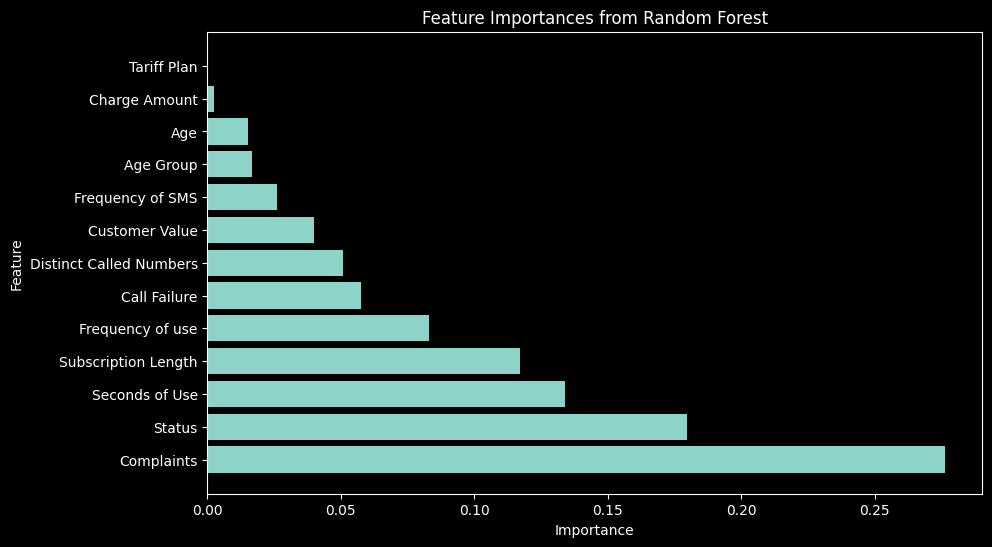

In [65]:
importances = rf.feature_importances_
feature_names = df.columns[:-1]
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,6))
plt.title('Feature Importances from Random Forest')
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## üéØ ÿßŸÑÿÆŸÑÿßÿµÿ© ÿßŸÑŸÜŸáÿßÿ¶Ÿäÿ© ŸàÿßŸÑÿ™ŸàÿµŸäÿßÿ™ ÿßŸÑŸÖŸÇÿ™ÿ±ÿ≠ÿ©

ÿ®ŸÜÿßÿ°Ÿã ÿπŸÑŸâ ŸÜÿ™ÿßÿ¶ÿ¨ ŸÜŸÖŸàÿ∞ÿ¨ ÿßŸÑÿ∫ÿßÿ®ÿ© ÿßŸÑÿπÿ¥Ÿàÿßÿ¶Ÿäÿ© (Random Forest) ÿßŸÑŸÜÿßÿ¨ÿ≠ (ÿØŸÇÿ© 98.6%)ÿå Ÿàÿ™ÿ≠ŸÑŸäŸÑ ÿ£ŸáŸÖŸäÿ© ÿßŸÑŸÖŸäÿ≤ÿßÿ™ (Feature Importance)ÿå Ÿáÿ∞Ÿá ŸáŸä ÿßŸÑŸÇÿµÿ© ÿßŸÑÿ™Ÿä ÿ™ÿ±ŸàŸäŸáÿß ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸàÿßŸÑÿ™ŸàÿµŸäÿßÿ™ ÿßŸÑŸÖŸÇÿ™ÿ±ÿ≠ÿ© ŸÑÿ¨Ÿáÿ© ÿßŸÑÿπŸÖŸÑ.

---

### ÿßŸÑŸÇÿµÿ© ÿßŸÑŸÜŸáÿßÿ¶Ÿäÿ©: ŸÑŸÖÿßÿ∞ÿß Ÿäÿ∫ÿßÿØÿ± ÿßŸÑÿπŸÖŸÑÿßÿ°ÿü

ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ Ÿàÿßÿ∂ÿ≠ ÿ¨ÿØÿßŸã: ÿßŸÑÿπŸÖŸÑÿßÿ° Ÿäÿ∫ÿßÿØÿ±ŸàŸÜ ŸÑÿ≥ÿ®ÿ®ŸäŸÜ ÿ±ÿ¶Ÿäÿ≥ŸäŸäŸÜ ŸäŸÖŸÉŸÜ ŸÇŸäÿßÿ≥ŸáŸÖÿß:

**1. ÿ™ÿ¨ÿ±ÿ®ÿ© ÿ≥Ÿäÿ¶ÿ© (Bad Experience):** üò°
* **`Complaints` (ÿßŸÑÿ¥ŸÉÿßŸàŸâ):** Ÿáÿ∞ÿß ŸáŸà ÿßŸÑÿ≥ÿ®ÿ® **ÿ±ŸÇŸÖ Ÿàÿßÿ≠ÿØ** ÿ®ŸÑÿß ŸÖŸÜÿßÿ≤ÿπ. ÿßŸÑÿπŸÖŸäŸÑ ÿßŸÑÿ∞Ÿä ŸäŸÇÿØŸÖ ÿ¥ŸÉŸàŸâ ŸáŸà ÿßŸÑÿπŸÖŸäŸÑ ÿßŸÑÿ£ŸÉÿ´ÿ± ÿπÿ±ÿ∂ÿ© ŸÑŸÑÿ±ÿ≠ŸäŸÑ.
* **`Status` (ÿßŸÑÿ≠ÿßŸÑÿ©):** ÿπŸÜÿØŸÖÿß Ÿäÿ™ÿ≠ŸàŸÑ ÿßŸÑÿπŸÖŸäŸÑ ÿ•ŸÑŸâ "ÿ∫Ÿäÿ± ŸÜÿ¥ÿ∑" (non-active)ÿå ŸÅŸáÿ∞Ÿá ÿπŸÑÿßŸÖÿ© ŸÖÿ™ÿ£ÿÆÿ±ÿ© ÿπŸÑŸâ ÿ£ŸÜŸá ŸÇÿ±ÿ± ÿßŸÑÿ±ÿ≠ŸäŸÑ ÿ®ÿßŸÑŸÅÿπŸÑ.
* **`Call Failure` (ŸÅÿ¥ŸÑ ÿßŸÑŸÖŸÉÿßŸÑŸÖÿßÿ™):** ÿ¨ŸàÿØÿ© ÿßŸÑÿÆÿØŸÖÿ© ÿßŸÑÿ±ÿØŸäÿ¶ÿ© ŸàŸÅÿ¥ŸÑ ÿßŸÑŸÖŸÉÿßŸÑŸÖÿßÿ™ ÿßŸÑŸÖÿ™ŸÉÿ±ÿ± ŸáŸà ÿπÿßŸÖŸÑ ÿ∑ÿ±ÿØ ÿ±ÿ¶Ÿäÿ≥Ÿä.

**2. ÿßŸÜÿÆŸÅÿßÿ∂ ÿßŸÑÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ŸàÿßŸÑŸàŸÑÿßÿ° (Low Engagement):** üìâ
* **`Seconds of Use` (ÿ´ŸàÿßŸÜŸä ÿßŸÑÿßÿ≥ÿ™ÿÆÿØÿßŸÖ):** ÿßŸÑÿπŸÖŸÑÿßÿ° ÿßŸÑÿ∞ŸäŸÜ ŸÑÿß Ÿäÿ™ÿ≠ÿØÿ´ŸàŸÜ ŸÉÿ´Ÿäÿ±ÿßŸã ŸáŸÖ ÿßŸÑÿ£ŸÇŸÑ ŸàŸÑÿßÿ°Ÿã ŸàÿßŸÑÿ£ÿ≥ŸáŸÑ ŸÖÿ∫ÿßÿØÿ±ÿ©.
* **`Subscription Length` (ŸÖÿØÿ© ÿßŸÑÿßÿ¥ÿ™ÿ±ÿßŸÉ):** ÿßŸÑÿπŸÖŸÑÿßÿ° ÿßŸÑÿ¨ÿØÿØ (ŸÖÿØÿ© ÿßÿ¥ÿ™ÿ±ÿßŸÉ ŸÇÿµŸäÿ±ÿ©) Ÿäÿ∫ÿßÿØÿ±ŸàŸÜ ÿ®ÿ≥ŸáŸàŸÑÿ© ÿ£ŸÉÿ®ÿ± ŸÖŸÜ ÿßŸÑÿπŸÖŸÑÿßÿ° ÿßŸÑŸÇÿØÿßŸÖŸâ.
* **`Frequency of use` (ÿ™ŸÉÿ±ÿßÿ± ÿßŸÑÿßÿ≥ÿ™ÿÆÿØÿßŸÖ):** ÿßŸÑÿπŸÖŸÑÿßÿ° ÿßŸÑÿ∞ŸäŸÜ ŸÑÿß Ÿäÿ™ÿµŸÑŸàŸÜ ŸÉÿ´Ÿäÿ±ÿßŸã ŸÑŸäÿ≥ ŸÑÿØŸäŸáŸÖ ŸÖÿß Ÿäÿ±ÿ®ÿ∑ŸáŸÖ ÿ®ÿßŸÑÿÆÿØŸÖÿ©.

---

### üí° ÿßŸÑÿ™ŸàÿµŸäÿßÿ™ ÿßŸÑŸÖŸÇÿ™ÿ±ÿ≠ÿ© ŸÑÿ¨Ÿáÿ© ÿßŸÑÿπŸÖŸÑ (Actionable Insights)

ÿ®ŸÜÿßÿ°Ÿã ÿπŸÑŸâ Ÿáÿ∞Ÿá ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨ÿå ŸäŸÖŸÉŸÜ ÿ™Ÿàÿ¨ŸäŸá ÿßŸÑŸÖŸàÿßÿ±ÿØ ŸÉÿßŸÑÿ™ÿßŸÑŸä:

* **ÿßŸÑÿ£ŸàŸÑŸàŸäÿ© ÿßŸÑŸÇÿµŸàŸâ: ŸÜÿ∏ÿßŸÖ ŸÖÿπÿßŸÑÿ¨ÿ© ÿßŸÑÿ¥ŸÉÿßŸàŸâ `(Complaints)`**
    * **ÿßŸÑŸÖÿ¥ŸÉŸÑÿ©:** `Complaints` ŸáŸà ÿßŸÑŸÖÿ§ÿ¥ÿ± ÿßŸÑÿ£ŸáŸÖ.
    * **ÿßŸÑÿ≠ŸÑ:** Ÿäÿ¨ÿ® ÿ•ŸÜÿ¥ÿßÿ° ŸÜÿ∏ÿßŸÖ "ÿ•ŸÜÿ∞ÿßÿ± ÿ£ÿ≠ŸÖÿ±" ŸÅŸàÿ±Ÿä. ÿ£Ÿä ÿ¥ŸÉŸàŸâ Ÿäÿ¨ÿ® ÿ£ŸÜ ÿ™ŸèÿπÿßŸÑÿ¨ ÿ®ÿ£ŸàŸÑŸàŸäÿ© ŸÇÿµŸàŸâ ŸÑÿ∂ŸÖÿßŸÜ ÿ±ÿ∂ÿß ÿßŸÑÿπŸÖŸäŸÑÿå ŸÑÿ£ŸÜ Ÿáÿ∞ÿß ŸáŸà ÿßŸÑÿπŸÖŸäŸÑ ÿßŸÑÿ£ŸÉÿ´ÿ± ÿπÿ±ÿ∂ÿ© ŸÑŸÑŸÖÿ∫ÿßÿØÿ±ÿ©.

* **ÿßŸÑÿ£ŸàŸÑŸàŸäÿ© ÿßŸÑÿ´ÿßŸÜŸäÿ©: ÿ™ÿ≠ÿ≥ŸäŸÜ ÿ¨ŸàÿØÿ© ÿßŸÑÿÆÿØŸÖÿ© `(Call Failure)`**
    * **ÿßŸÑŸÖÿ¥ŸÉŸÑÿ©:** ÿ¨ŸàÿØÿ© ÿßŸÑÿ¥ÿ®ŸÉÿ© ÿßŸÑÿ±ÿØŸäÿ¶ÿ© ÿ™ÿØŸÅÿπ ÿßŸÑÿπŸÖŸÑÿßÿ° ŸÑŸÑÿ±ÿ≠ŸäŸÑ.
    * **ÿßŸÑÿ≠ŸÑ:** ÿßŸÑÿßÿ≥ÿ™ÿ´ŸÖÿßÿ± ŸÅŸä ÿ™ÿ≠ÿ≥ŸäŸÜ ÿßŸÑÿ®ŸÜŸäÿ© ÿßŸÑÿ™ÿ≠ÿ™Ÿäÿ© ŸÑÿ™ŸÇŸÑŸäŸÑ ŸÖÿπÿØŸÑ `Call Failure` ŸáŸà ÿßÿ≥ÿ™ÿ´ŸÖÿßÿ± ÿ∂ÿ±Ÿàÿ±Ÿä ŸÑÿ™ŸÇŸÑŸäŸÑ ÿßŸÑŸÄ Churn.

* **ÿ®ÿ±ÿßŸÖÿ¨ ÿßŸÑŸàŸÑÿßÿ° ÿßŸÑÿßÿ≥ÿ™ÿ®ÿßŸÇŸäÿ© (Proactive Retention)**
    * **ÿßŸÑŸÖÿ¥ŸÉŸÑÿ©:** ÿßŸÑÿπŸÖŸÑÿßÿ° ŸäŸÇŸÑŸÑŸàŸÜ ÿßÿ≥ÿ™ÿÆÿØÿßŸÖŸáŸÖ (`Seconds of Use` Ÿà `Frequency of use`) *ŸÇÿ®ŸÑ* ÿ£ŸÜ Ÿäÿ∫ÿßÿØÿ±Ÿàÿß.
    * **ÿßŸÑÿ≠ŸÑ:** ÿ®ÿØŸÑÿßŸã ŸÖŸÜ ÿßŸÜÿ™ÿ∏ÿßÿ± ÿßŸÑÿπŸÖŸäŸÑ ŸÑŸäÿµÿ®ÿ≠ `Status = 2` (ÿ∫Ÿäÿ± ŸÜÿ¥ÿ∑)ÿå Ÿäÿ¨ÿ® ÿπŸÑŸâ ŸÜÿ∏ÿßŸÖ ÿßŸÑÿ™ÿ≥ŸàŸäŸÇ ÿßÿ≥ÿ™ŸáÿØÿßŸÅ ÿßŸÑÿπŸÖŸÑÿßÿ° ÿßŸÑÿ∞ŸäŸÜ Ÿäÿ∏Ÿáÿ±ŸàŸÜ ÿßŸÜÿÆŸÅÿßÿ∂ÿßŸã ŸÖŸÑÿ≠Ÿàÿ∏ÿßŸã ŸÅŸä "ÿ´ŸàÿßŸÜŸä ÿßŸÑÿßÿ≥ÿ™ÿÆÿØÿßŸÖ" ÿ£Ÿà "ÿ™ŸÉÿ±ÿßÿ± ÿßŸÑÿßÿ≥ÿ™ÿÆÿØÿßŸÖ" Ÿàÿ™ŸÇÿØŸäŸÖ ÿπÿ±Ÿàÿ∂ ÿ™ÿ≠ŸÅŸäÿ≤Ÿäÿ© ŸÑŸáŸÖ *ŸÇÿ®ŸÑ* ŸÅŸàÿßÿ™ ÿßŸÑÿ£ŸàÿßŸÜ.

In [ ]:
#import joblib

# ÿßŸÅÿ™ÿ±ÿ∂ ÿ£ŸÜ ÿßÿ≥ŸÖ ŸÜŸÖŸàÿ∞ÿ¨ŸÉ ŸáŸà rf_model
# ŸÇŸÖ ÿ®ÿ≠ŸÅÿ∏ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ŸÅŸä ŸÖŸÑŸÅ
#filename = 'rf_churn_model.pkl'
#joblib.dump(rf, filename)

#print(f"ÿ™ŸÖ ÿ≠ŸÅÿ∏ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿ®ŸÜÿ¨ÿßÿ≠ ŸÅŸä ŸÖŸÑŸÅ: {filename}")

ÿ™ŸÖ ÿ≠ŸÅÿ∏ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿ®ŸÜÿ¨ÿßÿ≠ ŸÅŸä ŸÖŸÑŸÅ: rf_churn_model.pkl
